### Score: `[50.5]`

Q1. `[5+5+4]` 1.3 注意单位，ppb的量级

Q2. `[11+10]` Good job!

Q3. `[5.5+10]` Good job!

各题批注用`### Note`给出，请自行查阅。

Assignment 03
Out: 11/06 19:00
Due: 11/20 19:00

Instructions
Collaboration:

Collaboration on solving the assignment is allowed, after you have thought about the problem sets on your own. It is also OK to get clarification (but not solutions) from online resources, again after you have thought about the problem sets on your own.

There are two requirements for collaboration:

Cite your collaborators fully and completely (e.g., “XXX explained to me what is asked in problem set 3”). Or cite online resources (e.g., “I got inspired by reading XXX”) that helped you.

Write your scripts and report independently - the scripts and report must come from you only.

Submitting your assignment:

Please write a report PS3.pdf.

Create a jupyter notebook named PS3.ipynb.

Upload your jupyter notebook and report to your Github ESE5023_Assignments_XXX repository (where XXX is your SUSTech ID) before the due time.

Late Submission:

Late submissions will not receive any credit. The submission time will be determined based on your latest GitHub file records.

**1**. Global methane levels from 2002
Methane (CH4) is a naturally occurring Greenhouse Gas (GHG), but one whose abundance has been increased substantially above its pre-industrial value by human activities, primarily because of agricultural emissions (e.g., rice production, ruminants) and fossil fuel production and use. A clear annual cycle is largely due to seasonal wetland emissions.

Atmospheric methane abundance is indirectly observed by various satellite instruments. These instruments measure spectrally resolved near-infrared and infrared radiation reflected or emitted by the Earth and its atmosphere. In the measured signal, molecular absorption signatures from methane and constituent gasses can be identified. It is through analysis of those absorption lines in these radiance observations that the averaged methane abundance in the sampled atmospheric column can be determined.

For this problem set, methane levels have been determined by applying several algorithms to different satellite instruments. Download the netCDF4 file (200301_202006-C3S-L3_GHG-PRODUCTS-OBS4MIPS-MERGED-v4.3.nc) here, which contains monthly-averaged methane levels (xch4) in the unit of ppb at each 5° (lon) x 5° (lat) grid over the globe from 2003-01 to 2020-06.

**1.1** [5 points] Compute methane climatology for each month, and plot your results in 12 panels.

<xarray.DataArray 'xch4' (time: 210, lat: 36, lon: 72)>
[544320 values with dtype=float32]
Coordinates:
  * time     (time) datetime64[ns] 2003-01-16T12:00:00 2003-02-15 ... 2020-06-16
  * lat      (lat) float64 -87.5 -82.5 -77.5 -72.5 -67.5 ... 72.5 77.5 82.5 87.5
  * lon      (lon) float64 -177.5 -172.5 -167.5 -162.5 ... 167.5 172.5 177.5
Attributes:
    standard_name:  dry_atmosphere_mole_fraction_of_methane
    long_name:      column-average dry-air mole fraction of atmospheric methane
    units:          1
    cell_methods:   time: mean
    fill_value:     1e+20
    comment:        Satellite retrieved column-average dry-air mole fraction ...


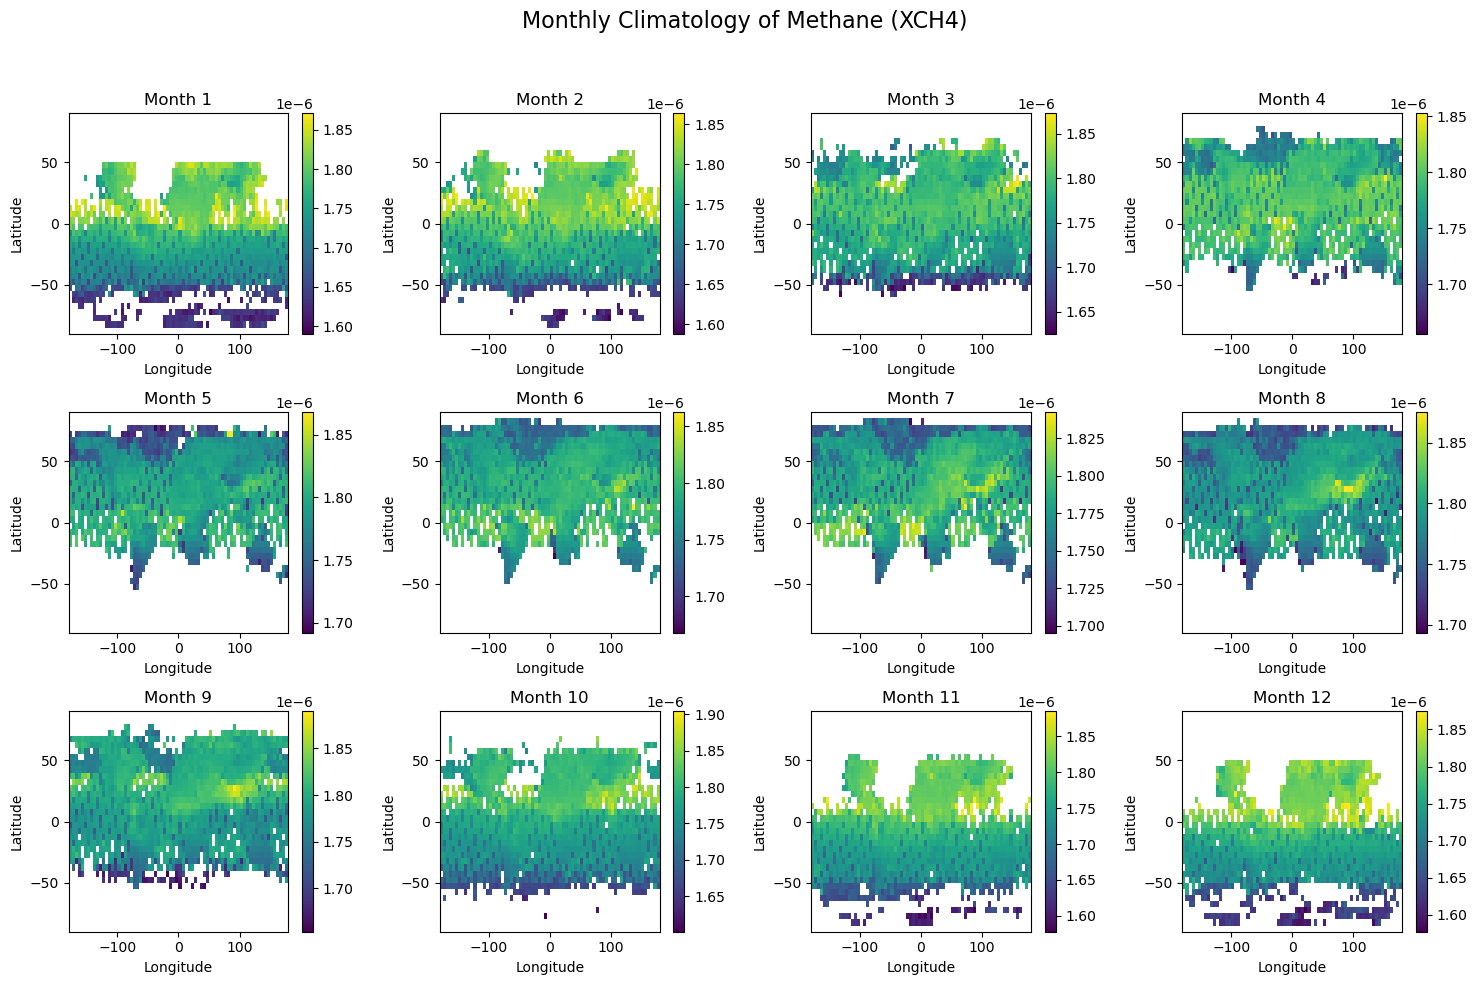

In [1]:
import numpy
import pandas as pd
import netCDF4
import xarray as xr
from matplotlib import pyplot as plt
%matplotlib inline
# 读取NetCDF文件
file_path = r"D:\ese5023\200301_202006-C3S-L3_GHG-PRODUCTS-OBS4MIPS-MERGED-v4.3.nc"
data = xr.open_dataset(file_path)
#提取xch4的数据
xch4 = data['xch4']
print(xch4)
# 按月份分组并计算月气候学平均
monthly_climatology = xch4.groupby("time.month").mean(dim="time")

# 设置绘图
fig, axes = plt.subplots(3, 4, figsize=(15, 10))
fig.suptitle('Monthly Climatology of Methane (XCH4)', fontsize=16) ### Note:标题中CH4写成下标更好，如'XCH$_4$'

# 循环绘制每个月的气候学平均
for i, month in enumerate(range(1, 13)):
    ax = axes[i // 4, i % 4]
    climatology = monthly_climatology.sel(month=month)
    
    # 绘制月气候平均数据
    pcm = ax.pcolormesh(climatology['lon'], climatology['lat'], climatology,
                        cmap='viridis', shading='auto')
    ax.set_title(f"Month {month}")
    ax.set_xlabel("Longitude")
    ax.set_ylabel("Latitude")

    # 添加颜色条
    fig.colorbar(pcm, ax=ax, orientation='vertical')

# 调整布局
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

**1.2** [5 points] Plot globally-averaged methane from 2003-01 to 2020-06 as a time series. Describe your results. Check your plot with this one.

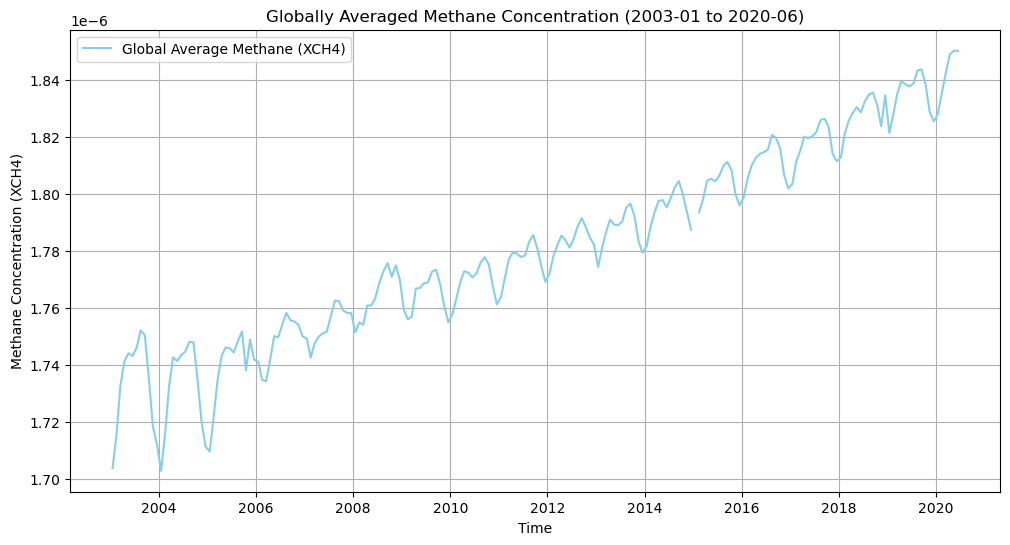

In [3]:
# 计算全球平均甲烷浓度（在 lat 和 lon 维度上取平均）
global_mean_xch4 = xch4.mean(dim=["lat", "lon"])

# 绘制时间序列
plt.figure(figsize=(12, 6))
plt.plot(global_mean_xch4["time"], global_mean_xch4, label="Global Average Methane (XCH4)", color="skyblue")
plt.xlabel("Time")
plt.ylabel("Methane Concentration (XCH4)")
plt.title("Globally Averaged Methane Concentration (2003-01 to 2020-06)")
plt.legend()
plt.grid(True)
plt.show()

**解释**结果随时间成螺旋上升状态，说明空气中的气体含量逐渐增加。

 Plot deseasonalized methane levels at point [15°S, 150°W] from 2003-01 to 2020-06 as a time series. Describe your results

***1.3*** [5 points] Plot deseasonalized methane levels at point [15°S, 150°W] from 2003-01 to 2020-06 as a time series. Describe your results.

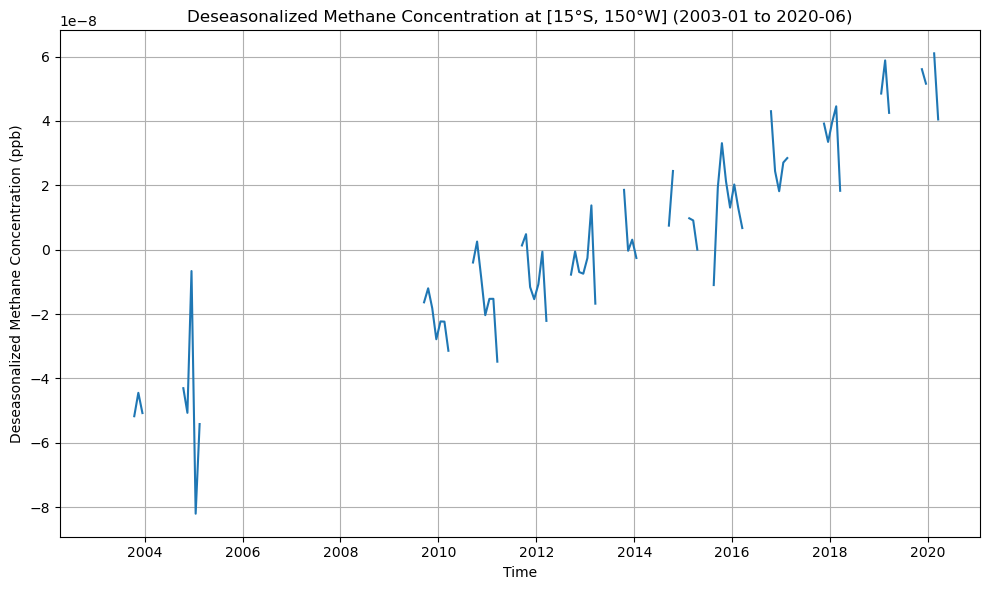

In [51]:
# Question 3
# Select the point [15°S, 150°W], which corresponds to lat=-15, lon=-150
level_15_150 = data.sel(lat=-15, lon=-150, method='nearest')
# Compute the seasonal cycle: average methane concentration for each month
seasonal_cycle = level_15_150.groupby('time.month').mean(dim='time')

# Compute the deseasonalized methane levels by subtracting the seasonal cycle from the original data
deseasonalized_methane = level_15_150 - seasonal_cycle.sel(month=level_15_150.time.dt.month)
# Plot the deseasonalized methane time series
plt.figure(figsize=(10, 6))
plt.plot(deseasonalized_methane['time'],deseasonalized_methane['xch4'], label='Deseasonalized')
plt.title('Deseasonalized Methane Concentration at [15°S, 150°W] (2003-01 to 2020-06)')
plt.xlabel('Time')
plt.ylabel('Deseasonalized Methane Concentration (ppb)') ### Note: 纵坐标如果要标ppb的话，数值要乘以10^9
plt.grid(True)
plt.tight_layout()
plt.show()

**解释**从04年到2020年，异常值越来越高，说明甲烷含量明显增加。

**2**. Niño 3.4 index
The Niño 3.4 anomalies may be thought of as representing the average equatorial sea surface temperatures (SSTs) across the Pacific from about the dateline to the South American coast (5N-5S, 170W-120W). The Niño 3.4 index typically uses a 3-month running mean, and El Niño or La Niña events are defined when the Niño 3.4 SSTs exceed +/- 0.5°C for a period of 5 months or more. Check Equatorial Pacific Sea Surface Temperatures for more about the Niño 3.4 index.

In this problem set, you will use the sea surface temperature (SST) data from NOAA. Download the netCDF4 file (NOAA_NCDC_ERSST_v3b_SST.nc) here.

***2.1*** [10 points] Compute monthly climatology for SST from Niño 3.4 region, and subtract climatology from SST time series to obtain anomalies.

In [59]:
import xarray as xr
import numpy as np
import pandas as pd

# 1. 读取数据文件（假设文件名为 'NOAA_NCDC_ERSST_v3b_SST.nc'）
file_path = 'NOAA_NCDC_ERSST_v3b_SST.nc'  # 替换为实际数据文件路径
ds = xr.open_dataset(file_path)

# 2. 提取 Niño 3.4 区域数据（5°N-5°S，170°W-120°W）
lat_bounds = (-5, 5)   # 纬度范围
lon_bounds = (190, 240)  # 经度范围（170°W = 190，120°W = 240）

# 选择感兴趣的区域
nino34_region = ds['sst'].sel(
    lat=slice(lat_bounds[0], lat_bounds[1]),
    lon=slice(lon_bounds[0], lon_bounds[1])
)

# 3. 计算每月的气候学平均值（长期月平均值）
monthly_climatology = nino34_region.groupby('time.month').mean(dim='time')

# 4. 计算 SST 异常值（原始数据减去气候学平均值）
sst_anomalies = nino34_region.groupby('time.month') - monthly_climatology

# 5. 查看计算的异常值
print(sst_anomalies)


<xarray.DataArray 'sst' (time: 684, lat: 5, lon: 26)>
array([[[-0.43157768, -0.41846275, -0.39795303, ..., -0.2116642 ,
         -0.23776245, -0.24401474],
        [-0.41259003, -0.4067192 , -0.3875141 , ..., -0.52064896,
         -0.5346451 , -0.51997185],
        [-0.40932274, -0.39743805, -0.36237717, ..., -0.6373882 ,
         -0.6171951 , -0.583725  ],
        [-0.4140854 , -0.37909317, -0.3215618 , ..., -0.43292618,
         -0.38404274, -0.3352623 ],
        [-0.5043678 , -0.43894005, -0.3710251 , ..., -0.17453575,
         -0.11044502, -0.06918144]],

       [[-0.5374584 , -0.52739716, -0.50823593, ..., -0.40254593,
         -0.44382668, -0.45287704],
        [-0.55093956, -0.539135  , -0.51673317, ..., -0.6660595 ,
         -0.7127285 , -0.710968  ],
        [-0.61242104, -0.5959244 , -0.5572338 , ..., -0.7235069 ,
         -0.7326374 , -0.73106194],
        [-0.6798363 , -0.6483364 , -0.5889931 , ..., -0.5397434 ,
         -0.50793266, -0.49977684],
        [-0.7830448 , -0.7

**解释**结果怎么表达呢，本来是想到用图，但是第二问正好是说画上一问的图。

***2.2*** [10 points] Visualize the computed Niño 3.4. Your plot should look similar to this one

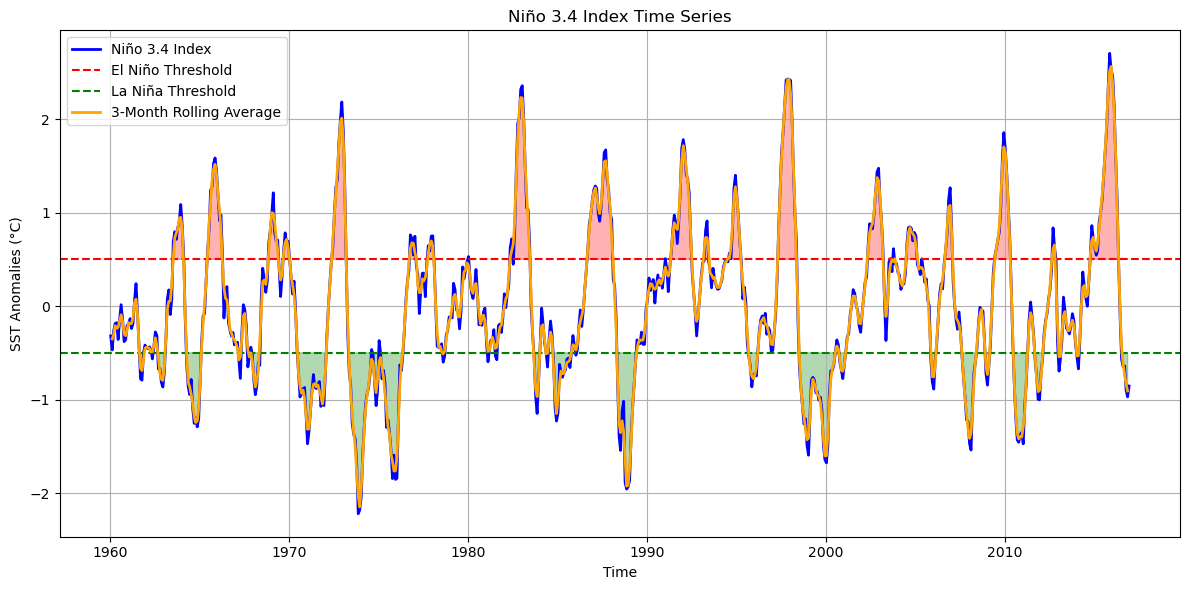

In [61]:
import xarray as xr
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 1. 读取数据文件
file_path = 'NOAA_NCDC_ERSST_v3b_SST.nc'  # 替换为实际数据文件路径
ds = xr.open_dataset(file_path)

# 2. 提取 Niño 3.4 区域数据（5°N-5°S，170°W-120°W）
lat_bounds = (-5, 5)   # 纬度范围
lon_bounds = (190, 240)  # 经度范围（170°W = 190，120°W = 240）

# 选择感兴趣的区域
nino34_region = ds['sst'].sel(
    lat=slice(lat_bounds[0], lat_bounds[1]),
    lon=slice(lon_bounds[0], lon_bounds[1])
)

# 3. 计算每月的气候学平均值（长期月平均值）
monthly_climatology = nino34_region.groupby('time.month').mean(dim='time')

# 4. 计算 SST 异常值（原始数据减去气候学平均值）
anomalies = nino34_region.groupby('time.month') - monthly_climatology

# 5. 计算 Niño 3.4 指数（区域内的平均值）
nino34_index = anomalies.mean(dim=['lat', 'lon'])

# 6. 计算 3 个月滑动平均并标注 El Niño 和 La Niña 事件
# 应用 3 个月滑动平均
nino34_rolling = nino34_index.rolling(time=3, center=True).mean()

# 标注 El Niño 和 La Niña 事件
el_nino = nino34_rolling >= 0.5  # El Niño 阈值
la_nina = nino34_rolling <= -0.5  # La Niña 阈值

# 7. 绘制 Niño 3.4 指数时间序列
plt.figure(figsize=(12, 6))
plt.plot(nino34_index['time'], nino34_index, label='Niño 3.4 Index', color='blue', lw=2)
plt.axhline(0.5, color='red', linestyle='--', label='El Niño Threshold')  # El Niño 阈值
plt.axhline(-0.5, color='green', linestyle='--', label='La Niña Threshold')  # La Niña 阈值
plt.plot(nino34_rolling['time'], nino34_rolling, label='3-Month Rolling Average', color='orange', lw=2)

# 添加事件标注
plt.fill_between(nino34_index['time'], 0.5, nino34_rolling, where=el_nino, color='red', alpha=0.3)
plt.fill_between(nino34_index['time'], -0.5, nino34_rolling, where=la_nina, color='green', alpha=0.3)

# 设置标签和标题
plt.xlabel('Time')
plt.ylabel('SST Anomalies (°C)')
plt.title('Niño 3.4 Index Time Series')

# 显示图例
plt.legend(loc='upper left')

# 显示网格
plt.grid(True)

# 展示图像
plt.tight_layout()
plt.show()


**解释**这个图加了花里胡哨的东西还挺好看的。应该符合例子的要求

***3***. Explore a netCDF dataset
Browse the NASA’s Goddard Earth Sciences Data and Information Services Center (GES DISC) website. Search and download a dataset you are interested in. You are also welcome to use data from your group in this problem set. But the dataset should be in netCDF format, and have temporal information.

***3.1*** [5 points] Plot a time series of a certain variable with monthly seasonal cycle removed.

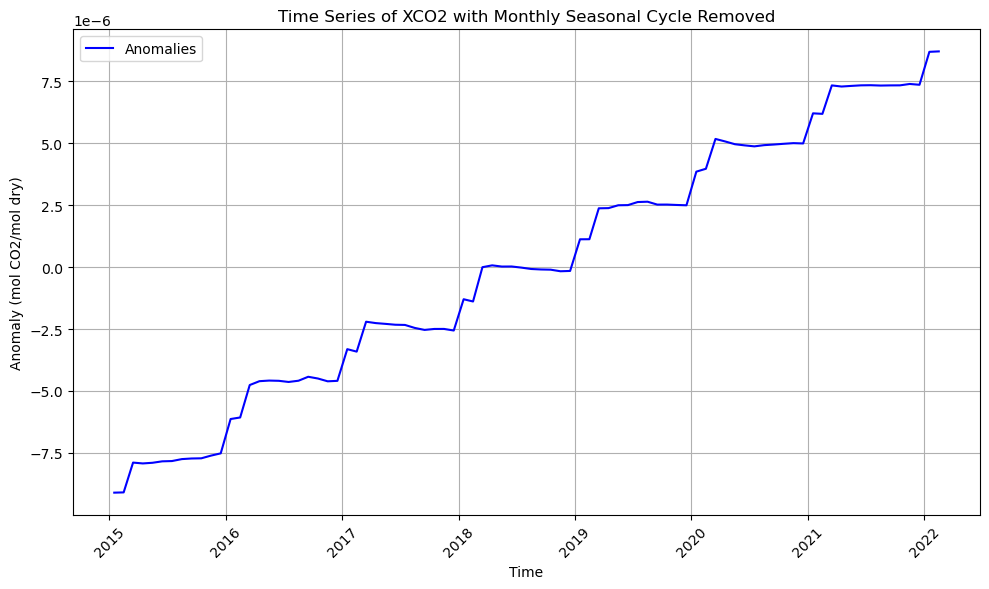

In [65]:
import xarray as xr
import glob
import matplotlib.pyplot as plt
# 定义文件路径模式
file_pattern = 'D:\\ese5023\\output_file\\*.nc4' 

# 获取所有匹配的文件路径
files = glob.glob(file_pattern)

# 读取并合并多个文件
ds = xr.open_mfdataset(files, combine='by_coords')

#提取相应数据
xco2 = ds['XCO2']

# 计算每月季节性循环：按月份对时间维度进行分组，计算每个月的平均值
monthly_seasonal_cycle = xco2.groupby('time.month').mean(dim='time')

# 去除季节性循环：从原始数据中减去该月的季节性平均值
xco2_anomalies = xco2.groupby('time.month') - monthly_seasonal_cycle

# 绘制去除季节性循环后的时间序列
plt.figure(figsize=(10, 6))
xco2_anomalies_mean = xco2_anomalies.mean(dim=['lat', 'lon'])  # 计算空间上的平均值
plt.plot(xco2_anomalies_mean['time'], xco2_anomalies_mean, label='Anomalies', color='blue')
plt.title('Time Series of XCO2 with Monthly Seasonal Cycle Removed')
plt.xlabel('Time')
plt.ylabel('Anomaly (mol CO2/mol dry)')
plt.grid(True)
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

3.2 [10 points] Make at least 5 different plots using the dataset.

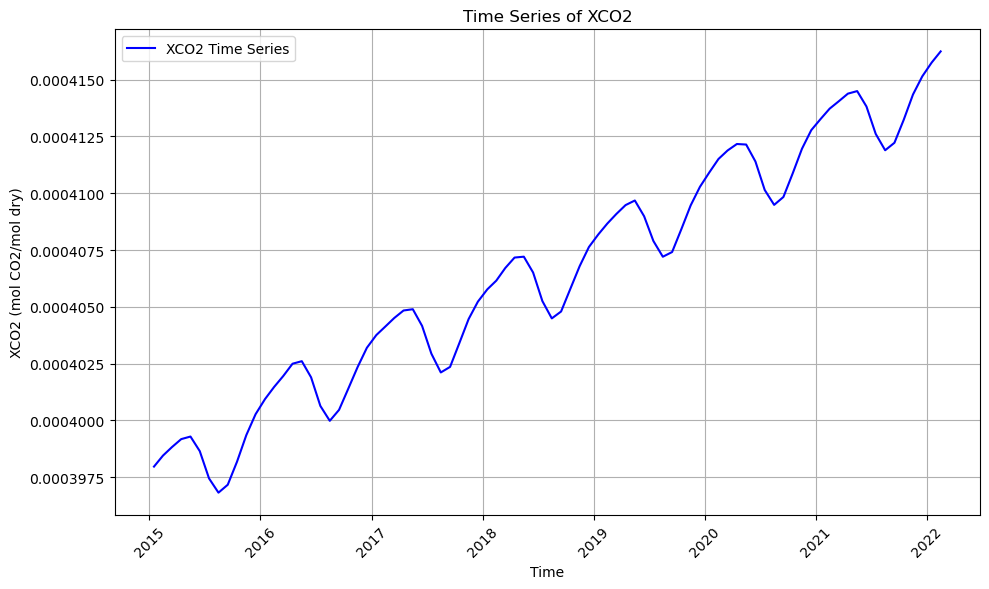

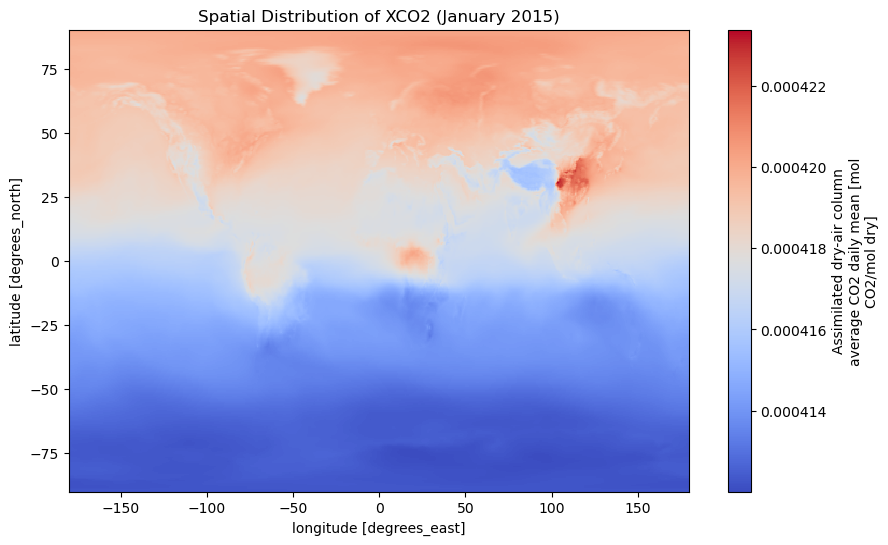

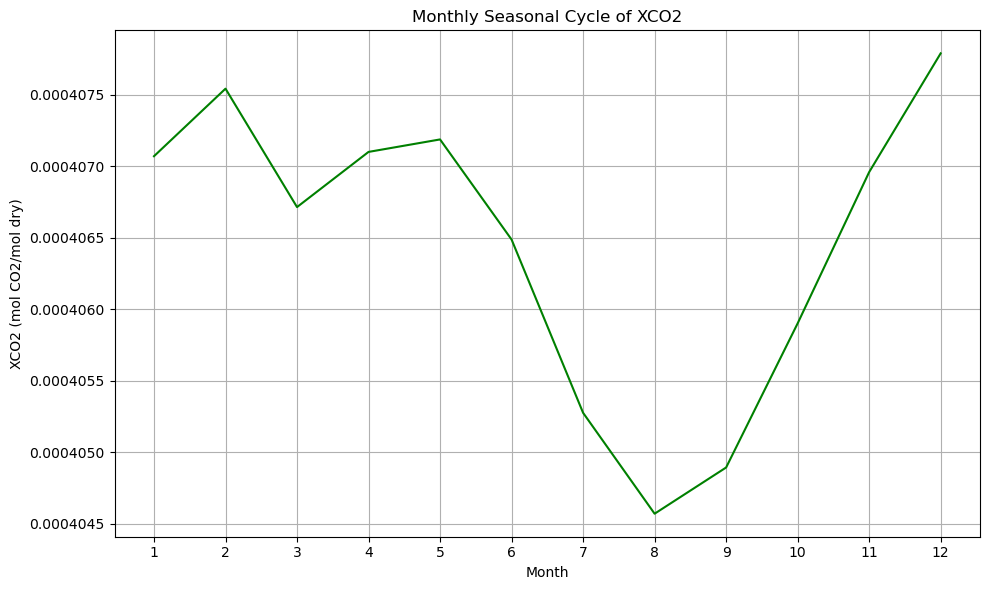

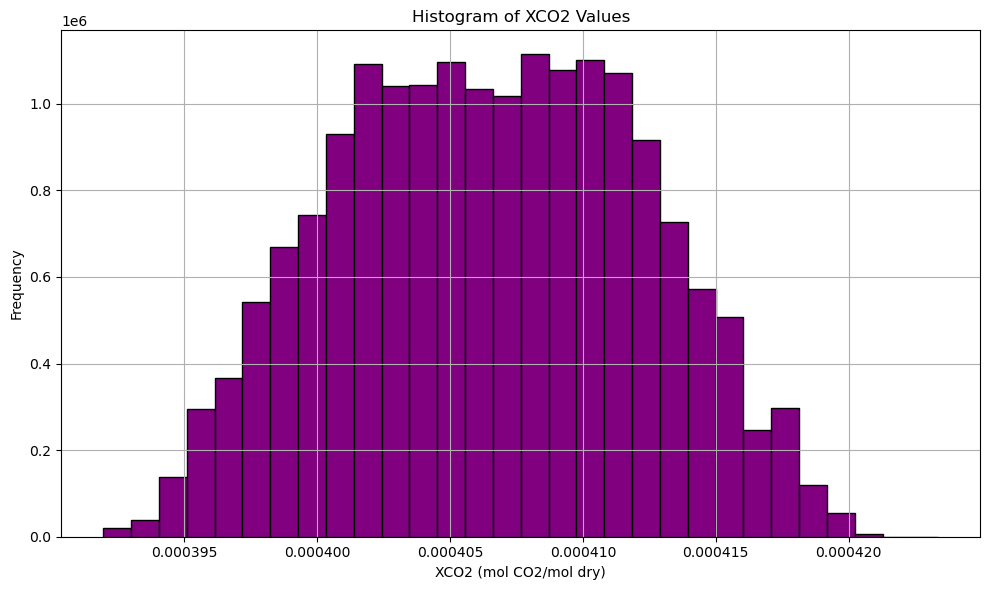

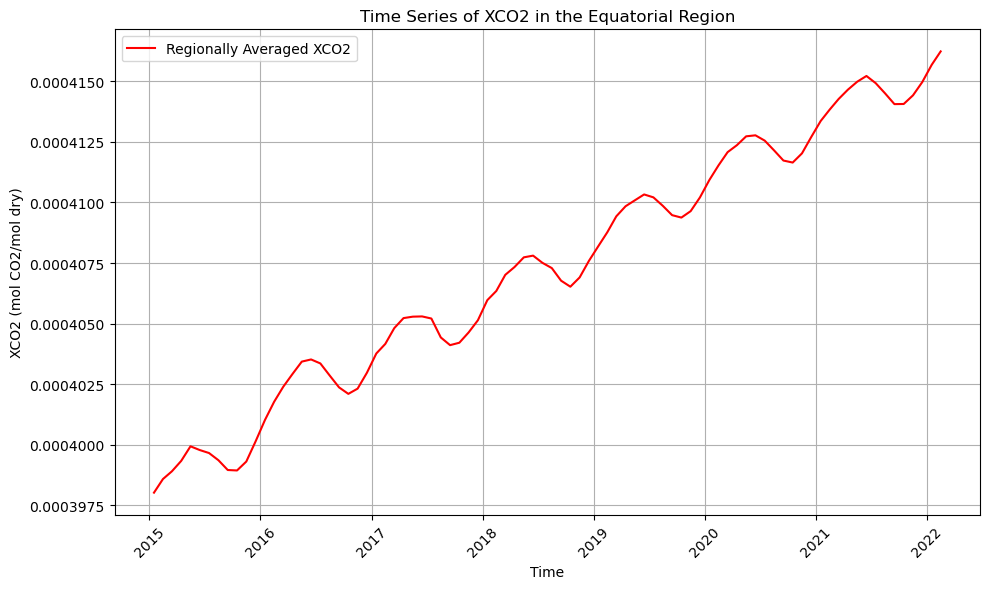

In [69]:
# 时间序列图：显示 XCO2 随时间变化
plt.figure(figsize=(10, 6))
xco2_mean = ds['XCO2'].mean(dim=['lat', 'lon'])  # 对空间维度求平均
plt.plot(xco2_mean['time'], xco2_mean, label='XCO2 Time Series', color='blue')
plt.title('Time Series of XCO2')
plt.xlabel('Time')
plt.ylabel('XCO2 (mol CO2/mol dry)')
plt.grid(True)
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 空间分布图：显示最新时间的 XCO2 空间分布
plt.figure(figsize=(10, 6))
xco2_slice = ds['XCO2'].isel(time=-1)  
xco2_slice.plot(cmap='coolwarm')
plt.title('Spatial Distribution of XCO2 (January 2015)')
plt.show()

# 计算每月的季节性循环（空间平均）
monthly_seasonal_cycle = ds['XCO2'].groupby('time.month').mean(dim='time')
monthly_seasonal_cycle_mean = monthly_seasonal_cycle.mean(dim=['lat', 'lon'])

# 绘制季节性循环
plt.figure(figsize=(10, 6))
plt.plot(monthly_seasonal_cycle_mean['month'], monthly_seasonal_cycle_mean, label='Monthly Seasonal Cycle', color='green')
plt.title('Monthly Seasonal Cycle of XCO2')
plt.xlabel('Month')
plt.ylabel('XCO2 (mol CO2/mol dry)')
plt.grid(True)
plt.xticks(range(1, 13))
plt.tight_layout()
plt.show()

# 直方图：显示 XCO2 的空间分布
plt.figure(figsize=(10, 6))
xco2_flat = ds['XCO2'].values.flatten()  # 将 XCO2 数据展平成一维数组
plt.hist(xco2_flat, bins=30, color='purple', edgecolor='black')
plt.title('Histogram of XCO2 Values')
plt.xlabel('XCO2 (mol CO2/mol dry)')
plt.ylabel('Frequency')
plt.grid(True)
plt.tight_layout()
plt.show()

# XCO2 在某个经纬度范围的时空变化：选择某一区域的 XCO2
xco2_region = ds['XCO2'].sel(lat=slice(-10, 10), lon=slice(-170, -120))  # 选择赤道附近的某个区域

# 计算该区域的空间平均值
xco2_region_mean = xco2_region.mean(dim=['lat', 'lon'])

# 绘制该区域的时间序列
plt.figure(figsize=(10, 6))
plt.plot(xco2_region_mean['time'], xco2_region_mean, label='Regionally Averaged XCO2', color='red')
plt.title('Time Series of XCO2 in the Equatorial Region')
plt.xlabel('Time')
plt.ylabel('XCO2 (mol CO2/mol dry)')
plt.grid(True)
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()
